In [6]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#差分方程
def nonlinear_system(y1_k, y2_k, u1_k, u2_k, u1_k_1, u2_k_1):
    # 生成噪声
    noise_level = 0.01
    noise1 = np.random.normal(loc=0, scale=np.sqrt(noise_level))
    noise2 = np.random.normal(loc=0, scale=np.sqrt(noise_level))
    # 计算输出
    output1 = y1_k / (1 + y2_k**2) + u1_k + 0.2 * u2_k + 0.4 * u1_k_1 + 0.1 * u2_k_1 + noise1
    output2 = y1_k * y2_k / (1 + y2_k**2) + 0.3 * u1_k + u2_k + 0.1 * u1_k_1 + 0.5 * u2_k_1 + noise2
    return output1, output2
# 参数设置
num_samples = 300
y1_data, y2_data = np.zeros(num_samples), np.zeros(num_samples)

# 初始化初始条件
y1_data[0], y2_data[0] = 1.0, 0.5

# 生成输入数据在[-1, 1]之间
u1_data = np.random.uniform(-1, 1, num_samples)
u2_data = np.random.uniform(-1, 1, num_samples)
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0  # 设置第一个时刻的上一个时刻输入为0

# 生成数据
for k in range(1, num_samples):
    y1_data[k], y2_data[k] = nonlinear_system(y1_data[k-1], y2_data[k-1], u1_data[k], u2_data[k], u1_data_1[k], u2_data_1[k])

print()
# 假设有训练数据 u1_data, u2_data, y1_data_1 和 y1_data
# 将它们组合成输入特征矩阵 X 和输出标签向量 y
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0
y1_data_1 = np.roll(y1_data, 1)
y1_data_1[0] = 0.3
X = np.column_stack((u1_data, u2_data, u1_data_1, u2_data_1, y1_data_1))
y = y1_data

In [7]:

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义高斯核函数
def gaussian_kernel(X1, X2, gamma=0.0036229545071474155):
    return rbf_kernel(X1, X2, gamma=gamma)

# 定义 LS-SVR 的目标函数，使用高斯核函数
def objective(W, X, y, C):
    # 使用高斯核函数将输入数据映射到高维空间
    K = gaussian_kernel(X, X_train)
    y_pred = np.dot(K, W)
    errors = y - y_pred
    loss = 0.5 * np.dot(W, W) + 0.5 * C * np.sum(errors**2)
    return loss

# 初始化权重向量
initial_W = np.zeros(X_train.shape[0])

# 设置惩罚系数 C
C = 1.0

# 使用 minimize 函数最小化目标函数
result = minimize(objective, initial_W, args=(X_train, y_train, C), method='L-BFGS-B')

# 输出最优的权重向量
best_W = result.x
print("Best Weights:", best_W)

# 在测试集上进行预测，同样使用高斯核函数
K_test = gaussian_kernel(X_test, X_train)
y_pred = np.dot(K_test, best_W)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Best Weights: [-0.41328159 -0.01677346  0.81528179 -0.17338292 -0.38687753  0.00378047
  0.23539309 -0.58850711 -0.20289975  0.24173122  0.6530858  -0.77680336
 -0.14244113 -0.02453723 -0.0732615  -0.07710528 -0.5246286   0.19161254
  0.18267617  0.70070485 -0.07165815 -0.95110205  0.51832276 -0.33255927
  0.00687042 -0.49548805 -0.46045478  0.06975153  0.86018223  0.11391171
  0.22276655 -0.06692091 -0.31036936  0.26297572 -0.82264653  0.41532846
 -0.02099862  0.05372173  0.23077612 -0.06222228 -0.26063075 -0.79035077
 -0.00886034 -0.27223298 -0.30016215 -0.21239445  0.98058192  0.32066958
 -0.1229993  -0.4225793  -0.36294749  0.03031976 -0.33130923 -0.02244861
  0.20759665 -0.13301348  0.44017759  0.79382032  0.25837497 -0.00365679
 -0.23285443 -0.22779139 -0.58593527  0.04486986  0.52725275 -0.26453397
 -0.8250217  -0.54059345  0.0409123  -0.11414315  0.37495667 -0.08420205
 -0.37813191 -0.09494804  0.70362739 -0.10261494 -0.80861556 -0.11125888
  0.17629534  0.79305697 -0.15991386 

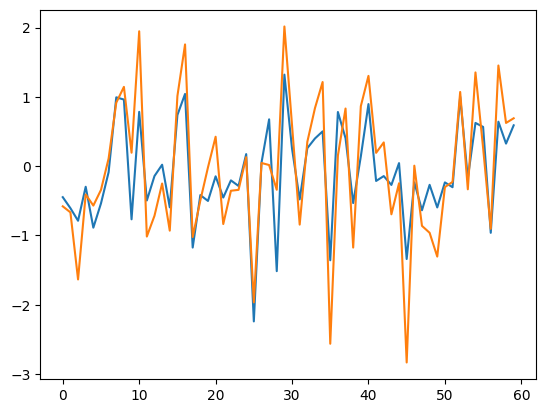

In [8]:
plt.plot(y_pred)
plt.plot(y_test)

In [13]:
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 假设有训练数据 u1_data, u2_data, y1_data_1 和 y1_data
# 将它们组合成输入特征矩阵 X 和输出标签向量 y
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0
y1_data_1 = np.roll(y1_data, 1)
y1_data_1[0] = 0.3
X = np.column_stack((u1_data, u2_data, u1_data_1, u2_data_1, y1_data_1))
y = y1_data

In [ ]:
# 训练模型
def model_train(params,X_train, y_train,K_train):
    C ,gamma= params
    
    # 定义 LS-SVR 的目标函数
    def objective(W, X, y, C): 
        
        # print(K.shape)
        # print(W.shape)
        y_pred = np.dot(K_train, W)
        # y_pred = np.dot(X, W)
        errors = y - y_pred
        # 损失函数
        loss = 0.5 * np.dot(W, W) + 0.5 * C * np.sum(errors**2)
        return loss
    # 初始化权重向量
    initial_W = np.zeros(X_train.shape[0])
    initial_b = np.zeros(X_train.shape[0])
    # 使用minimize 函数最小化目标函数
    result = minimize(objective, initial_W, args=(X_train, y_train, C),
                        method='L-BFGS-B')
    # print(result)
    # 输出最优的权重向量
    best_W = result.x

    return best_W




# 定义优化目标函数：输入params，输出mse
def objective(params):

    C ,gamma= params
    K_train = rbf_kernel(X_train, X_train, gamma=gamma) 
    K_test = rbf_kernel(X_test, X_train, gamma=gamma) 

    # 训练模型 输入C ,gamma，输出 best_W
    best_W = model_train(params, X_train, y_train,K_train)
    # 模型预测      
    y_pred = np.dot(K_test, best_W)
    
    # y_pred = np.dot(X_test, best_W)
    # 定义适应度函数
    mse = mean_squared_error(y_test, y_pred)
    # print(f'Mean Squared Error: {mse}')
    return mse


# 定义参数搜索空间
space = [(0.1, 120.0, 'log-uniform'),  # C范围为[0.1, 100]的对数均匀分布
        (0.001, 10.0, 'log-uniform')]  # gamma范围为[0.01, 10]的对数均匀分布
# 使用粒子群算法进行参数优化
result = gp_minimize(objective, space, n_calls=20, random_state=42)
# 输出最优参数params
best_params = result.x
print(f"Best Parameters (C, gamma): {best_params}")



## 使用最优参数params训练模型
C ,gamma= best_params
K_train = rbf_kernel(X_train, X_train, gamma=gamma) 
K_test = rbf_kernel(X_test, X_train, gamma=gamma) 

best_W = model_train(best_params, X_train, y_train,K_train)
# 在测试集上进行预测
y_pred = np.dot(K_test, best_W)
# y_pred = np.dot(X_test, best_W)
# 评估最终模型的性能
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Optimized Parameters: {mse}')